<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/NBA_PREDICTIVE_MODELING/NBA_STATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadicitcas y Probabilidades 🥇

| Columna            | Descripción                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `SEASON_ID`        | Identificador de la temporada (por ejemplo, '2023' para la temporada 2023-2024). |
| `TEAM_ID`          | Identificador único del equipo en la base de datos de la NBA.               |
| `TEAM_ABBREVIATION`| Abreviación oficial del equipo (por ejemplo, 'CHI' para Chicago Bulls).     |
| `TEAM_NAME`        | Nombre completo del equipo (por ejemplo, 'Chicago Bulls').                 |
| `GAME_ID`          | Identificador único del juego en la base de datos de la NBA.               |
| `GAME_DATE`        | Fecha en la que se jugó el partido, en formato `YYYY-MM-DD`.               |
| `MATCHUP`          | Indica el enfrentamiento y si el equipo jugó como local ('vs.') o visitante ('@'). |
| `WL`               | Resultado del partido para el equipo (ganado: 'W', perdido: 'L').          |
| `MIN`              | Minutos totales jugados por el equipo en el partido.                       |
| `PTS`              | Puntos anotados por el equipo en el partido.                               |
| `FGM`              | Total de tiros de campo anotados.                                          |
| `FGA`              | Total de tiros de campo intentados.                                        |
| `FG_PCT`           | Porcentaje de tiros de campo anotados (`FGM / FGA`).                       |
| `FG3M`             | Total de tiros de tres puntos anotados.                                    |
| `FG3A`             | Total de tiros de tres puntos intentados.                                  |
| `FG3_PCT`          | Porcentaje de tiros de tres puntos anotados (`FG3M / FG3A`).               |
| `FTM`              | Total de tiros libres anotados.                                            |
| `FTA`              | Total de tiros libres intentados.                                          |
| `FT_PCT`           | Porcentaje de tiros libres anotados (`FTM / FTA`).                         |
| `OREB`             | Total de rebotes ofensivos.                                                |
| `DREB`             | Total de rebotes defensivos.                                               |
| `REB`              | Total de rebotes (`OREB + DREB`).                                          |
| `AST`              | Total de asistencias.                                                     |
| `STL`              | Total de robos de balón.                                                  |
| `BLK`              | Total de bloqueos.                                                        |
| `TOV`              | Total de pérdidas de balón.                                               |
| `PF`               | Total de faltas personales cometidas.                                      |
| `PLUS_MINUS`       | Diferencia en el marcador cuando el equipo estuvo en el campo.             |


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el DataFrame limpio
df_limpio = pd.read_csv('/content/drive/My Drive/df_limpio.csv')
df_limpio.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612737,ATL,Atlanta Hawks,22400001,2024-11-12,ATL @ BOS,W,240,117,...,0.538,19.0,25.0,44.0,35,16.0,2,16,17,1.0
1,22024,1610612737,ATL,Atlanta Hawks,22400198,2024-11-09,ATL vs. CHI,L,240,113,...,0.733,10.0,29.0,39.0,31,8.0,5,13,19,-12.0
2,22024,1610612737,ATL,Atlanta Hawks,22400185,2024-11-08,ATL @ DET,L,240,121,...,0.783,15.0,29.0,44.0,30,12.0,7,17,21,-1.0
3,22024,1610612737,ATL,Atlanta Hawks,22400171,2024-11-06,ATL vs. NYK,W,240,121,...,0.727,16.0,32.0,48.0,31,12.0,4,8,14,5.0
4,22024,1610612737,ATL,Atlanta Hawks,22400157,2024-11-04,ATL vs. BOS,L,240,93,...,0.813,8.0,35.0,43.0,23,9.0,3,19,13,-30.0


# 1. Comprensión del Problema y Contexto
Este paso implica documentar y reflexionar sobre los datos y el objetivo. Lo dividiría en varias etapas prácticas:

### 1.  Definir el objetivo principal
El modelo está diseñado para predecir si un equipo gana (W) o pierde (L) un partido basado en las estadísticas disponibles.

- <B>"El objetivo es predecir el resultado de un partido (ganado o perdido) usando estadísticas del equipo como puntos anotados, porcentajes de tiro y asistencias." </B>

### 2. Revisar el significado de las variables
Ya se definió el significado de las columnas, pero ahora analizaremos cómo podrían impactar en el objetivo:

- Variables directas: PTS (Puntos anotados)
- PLUS_MINUS (Diferencia de puntos)
- FG_PCT (Porcentaje de tiro de campo).

- <B>Variables contextuales: </B> TEAM_ABBREVIATION, MATCHUP, GAME_DATE.
- <B>Variables posiblemente redundantes: </B> FGM (Tiros de campo anotados) podría correlacionarse fuertemente con PTS.
Acción:

- <B> Mayor PTS, REB, y AST deberían correlacionarse con victorias (W).
Variables como PLUS_MINUS son indicadores fuertes porque reflejan el rendimiento global del equipo. </B>

### 3. Evaluar la distribución de la variable objetivo (WL)
Antes de avanzar, es crucial entender si los datos están balanceados. Un desequilibrio en clases (por ejemplo, 80% victorias y 20% derrotas) podría afectar el rendimiento del modelo.

Acción:
Contar el número total de W y L para calcular la proporción.
Documentar el resultado e identificar si será necesario aplicar técnicas como sobremuestreo o ajuste de pesos en el modelo.
Ejemplo de resultado:


1-  Identificar el tipo de datos y partición
Analizar cómo se distribuyen los datos:

- Número de partidos por temporada: ¿Hay datos consistentes para cada temporada o equipo?
- Proporción por equipo: ¿Algunos equipos están sobrerrepresentados?
Diferencia entre partidos locales y visitantes: Usar la variable MATCHUP para verificar si hay patrones entre estos grupos.

Acción: Generar tablas o resúmenes básicos que muestren:

- Cantidad de partidos por temporada.
- Cantidad de partidos por equipo.
- Distribución de partidos locales vs visitantes.

2-  Contextualizar el análisis
Considerar factores externos que puedan influir en los datos:

- Calendario: Equipos pueden tener mejores rachas al inicio o final de temporada.
- Equipo contrario: Algunos equipos fuertes podrían sesgar los resultados.
Esto ayuda a decidir si se incluirán nuevas características derivadas, como el rendimiento histórico del oponente (TEAM_OPP_AVG).


"El objetivo es un problema de clasificación binaria (WL)."
"La variable PLUS_MINUS es un fuerte indicador del resultado."
"Los datos están distribuidos 60% victorias y 40% derrotas."
"Se analizarán diferencias entre partidos locales y visitantes como hipótesis inicial."


## Análisis de la Distribución de WL:
### OBJETIVO

Revisar la distribución de la variable WL (victoria o derrota) para verificar si está balanceada en los datos. Esto es importante para detectar posibles problemas de sesgo que puedan afectar el rendimiento del modelo.

Pasos a seguir:

- Contar las frecuencias absolutas de cada clase (W y L).
- Calcular las proporciones de W y L para entender su distribución.
- Visualizar la distribución de WL con gráficos de barras o circulares.

Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64



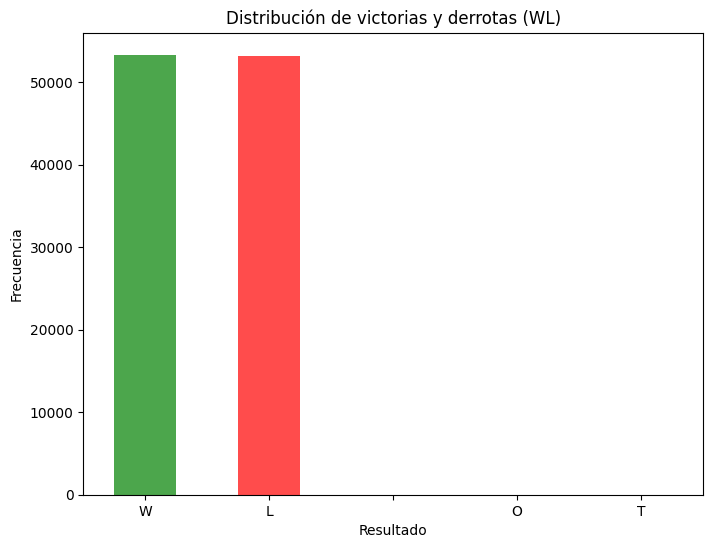

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_limpio es el DataFrame ya limpio
def revisar_distribucion_WL(df):
    """
    Revisa la distribución de la columna 'WL' para identificar si las clases están balanceadas.
    Muestra las frecuencias absolutas, las proporciones y un gráfico de barras.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'WL' con resultados de partidos.

    Returns:
    None: Imprime las frecuencias y proporciones, y muestra el gráfico.
    """
    # Contar las frecuencias de cada clase ('W' y 'L')
    conteo = df['WL'].value_counts()

    # Calcular las proporciones de cada clase
    proporciones = df['WL'].value_counts(normalize=True) * 100

    # Imprimir resultados
    print(f"Frecuencias de cada clase:\n{conteo}\n")
    print(f"Proporciones de cada clase (%):\n{proporciones}\n")

    # Graficar la distribución
    plt.figure(figsize=(8, 6))
    conteo.plot(kind='bar', color=['green', 'red'], alpha=0.7)
    plt.title('Distribución de victorias y derrotas (WL)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# Llamar la función con el DataFrame df_limpio
revisar_distribucion_WL(df_limpio)


Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64


Comentario sobre la distribución:
Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64

Distribución desbalanceada.
Una distribución desbalanceada puede causar sesgo en el modelo, favoreciendo la clase mayoritaria. Se podrían considerar técnicas de muestreo o ponderación.


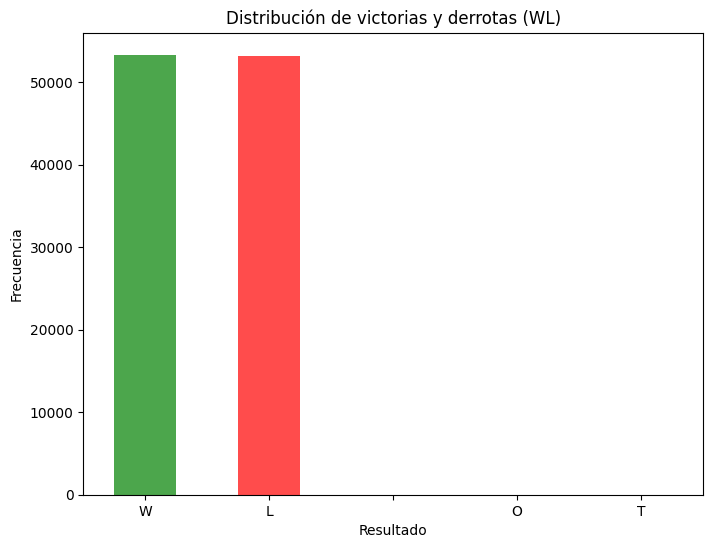

In [ ]:
def analizar_distribucion(frecuencias, proporciones):
    """
    Analiza la distribución de clases en una columna categórica y ofrece un comentario sobre su
    impacto potencial en un modelo de machine learning.

    Args:
    frecuencias (pd.Series): Frecuencias absolutas de cada clase en la columna.
    proporciones (pd.Series): Proporciones (en porcentaje) de cada clase en la columna.

    Returns:
    str: Comentario sobre la distribución y el impacto en el modelo.
    """

    # Comprobamos si la distribución es equilibrada
    if abs(proporciones.max() - proporciones.min()) < 0.1:
        distribucion = "Distribución equilibrada."
        impacto = "La distribución casi equilibrada no debería causar sesgo en el modelo, ya que las clases están bien representadas."
    else:
        distribucion = "Distribución desbalanceada."
        impacto = "Una distribución desbalanceada puede causar sesgo en el modelo, favoreciendo la clase mayoritaria. Se podrían considerar técnicas de muestreo o ponderación."

    # Generamos el comentario final
    comentario = f"Frecuencias de cada clase:\n{frecuencias}\n\nProporciones de cada clase (%):\n{proporciones}\n\n{distribucion}\n{impacto}"

    return comentario

def revisar_distribucion_WL(df):
    """
    Revisa la distribución de la columna 'WL' para identificar si las clases están balanceadas.
    Muestra las frecuencias absolutas, las proporciones y un gráfico de barras.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'WL' con resultados de partidos.

    Returns:
    None: Imprime las frecuencias y proporciones, y muestra el gráfico.
    """
    # Contar las frecuencias de cada clase ('W' y 'L')
    conteo = df['WL'].value_counts()

    # Calcular las proporciones de cada clase
    proporciones = df['WL'].value_counts(normalize=True) * 100

    # Imprimir resultados
    print(f"Frecuencias de cada clase:\n{conteo}\n")
    print(f"Proporciones de cada clase (%):\n{proporciones}\n")

    # Análisis de distribución
    comentario = analizar_distribucion(conteo, proporciones)
    print("\nComentario sobre la distribución:")
    print(comentario)

    # Graficar la distribución
    plt.figure(figsize=(8, 6))
    conteo.plot(kind='bar', color=['green', 'red'], alpha=0.7)
    plt.title('Distribución de victorias y derrotas (WL)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# Llamar la función con el DataFrame df_limpio
revisar_distribucion_WL(df_limpio)



2. Estadísticas Descriptivas
Calcular estadísticas clave para comprender cada variable:

Variables numéricas:
Media, mediana, moda, varianza, desviación estándar.
Percentiles (25%, 50%, 75%) para identificar distribución.
Valores atípicos (outliers) con base en el rango intercuartil (IQR).
Variables categóricas (WL, TEAM_ABBREVIATION):
Frecuencias relativas y absolutas.
Distribución de clases para verificar balance.
¿Por qué? Esto da un panorama general del comportamiento de las variables y destaca posibles problemas, como variabilidad alta o columnas no útiles.



In [ ]:
import pandas as pd
import numpy as np

def calcular_estadisticas_descriptivas(df):
    """
    Calcula las estadísticas descriptivas de las variables numéricas y categóricas del DataFrame.

    Args:
    df (pd.DataFrame): DataFrame que contiene los datos limpios.

    Returns:
    None: Imprime las estadísticas clave de las variables numéricas y categóricas.
    """
    # Estadísticas para variables numéricas
    print("Estadísticas Descriptivas de Variables Numéricas:")
    numéricas = df.select_dtypes(include=[np.number])  # Seleccionar solo las variables numéricas
    estadisticas_numericas = numéricas.describe().T  # Transponer para tener las variables como filas
    estadisticas_numericas['moda'] = numéricas.mode().iloc[0]  # Moda

    print(estadisticas_numericas[['mean', '50%', 'std', 'min', 'max', '25%', '75%', 'moda']])

    # Detectar valores atípicos (outliers) usando el Rango Intercuartílico (IQR)
    print("\nDetección de valores atípicos (outliers) en variables numéricas:")
    IQR = numéricas.quantile(0.75) - numéricas.quantile(0.25)
    limites_inferiores = numéricas.quantile(0.25) - 1.5 * IQR
    limites_superiores = numéricas.quantile(0.75) + 1.5 * IQR

    outliers = ((numéricas < limites_inferiores) | (numéricas > limites_superiores))
    print("Valores atípicos detectados:")
    print(outliers.sum())

    # Estadísticas para variables categóricas
    print("\nEstadísticas Descriptivas de Variables Categóricas:")
    categoricas = df.select_dtypes(include=[object])  # Seleccionar solo las variables categóricas

    for columna in categoricas.columns:
        print(f"\nFrecuencias de la variable {columna}:")
        print(categoricas[columna].value_counts())  # Frecuencias absolutas
        print(f"\nProporciones de la variable {columna}:")
        print(categoricas[columna].value_counts(normalize=True) * 100)  # Frecuencias relativas

    # Distribución balanceada para variables categóricas clave como 'WL'
    print("\nDistribución balanceada de la variable WL:")
    conteo_WL = df['WL'].value_counts()
    proporciones_WL = df['WL'].value_counts(normalize=True) * 100
    print(f"Frecuencias: \n{conteo_WL}")
    print(f"Proporciones (%): \n{proporciones_WL}")

    if abs(proporciones_WL.max() - proporciones_WL.min()) < 0.1:
        print("\nLa distribución de la variable 'WL' está equilibrada.")
    else:
        print("\nLa distribución de la variable 'WL' está desequilibrada.")

# Llamar la función con el DataFrame df_limpio
calcular_estadisticas_descriptivas(df_limpio)


Estadísticas Descriptivas de Variables Numéricas:
                    mean           50%           std           min  \
SEASON_ID   2.287008e+04  2.200500e+04  5.226508e+03  1.200300e+04   
TEAM_ID     1.610613e+09  1.610613e+09  8.569652e+00  1.610613e+09   
GAME_ID     6.111188e+07  2.200072e+07  2.289199e+08  1.030000e+07   
MIN         2.403437e+02  2.400000e+02  1.247569e+01 -1.000000e+00   
PTS         1.021962e+02  1.020000e+02  1.406874e+01  0.000000e+00   
FGM         3.835176e+01  3.800000e+01  6.043963e+00  0.000000e+00   
FGA         8.345197e+01  8.300000e+01  8.869995e+00  0.000000e+00   
FG_PCT      4.601273e-01  4.590000e-01  5.853765e-02  0.000000e+00   
FG3M        6.357862e+00  6.000000e+00  4.501192e+00  0.000000e+00   
FG3A        1.805297e+01  1.700000e+01  1.090101e+01  0.000000e+00   
FG3_PCT     3.392690e-01  3.392690e-01  1.516140e-01  0.000000e+00   
FTM         1.913488e+01  1.900000e+01  6.624713e+00  0.000000e+00   
FTA         2.531265e+01  2.500000e+01  

Estadísticas Descriptivas de Variables Numéricas:

                    mean           50%           std          IQR
SEASON_ID   2.287008e+04  2.200500e+04  5.226508e+03       22.000
TEAM_ID     1.610613e+09  1.610613e+09  8.569652e+00       15.000
GAME_ID     6.111188e+07  2.200072e+07  2.289199e+08  8299496.500
MIN         2.403437e+02  2.400000e+02  1.247569e+01        0.000
PTS         1.021962e+02  1.020000e+02  1.406874e+01       18.000
FGM         3.835176e+01  3.800000e+01  6.043963e+00        8.000
FGA         8.345197e+01  8.300000e+01  8.869995e+00       11.000
FG_PCT      4.601273e-01  4.590000e-01  5.853765e-02        0.080
FG3M        6.357862e+00  6.000000e+00  4.501192e+00        6.000
FG3A        1.805297e+01  1.700000e+01  1.090101e+01       15.000
FG3_PCT     3.392690e-01  3.392690e-01  1.516140e-01        0.179
FTM         1.913488e+01  1.900000e+01  6.624713e+00        9.000
FTA         2.531265e+01  2.500000e+01  8.211831e+00       12.000
FT_PCT      7.564927e-01 

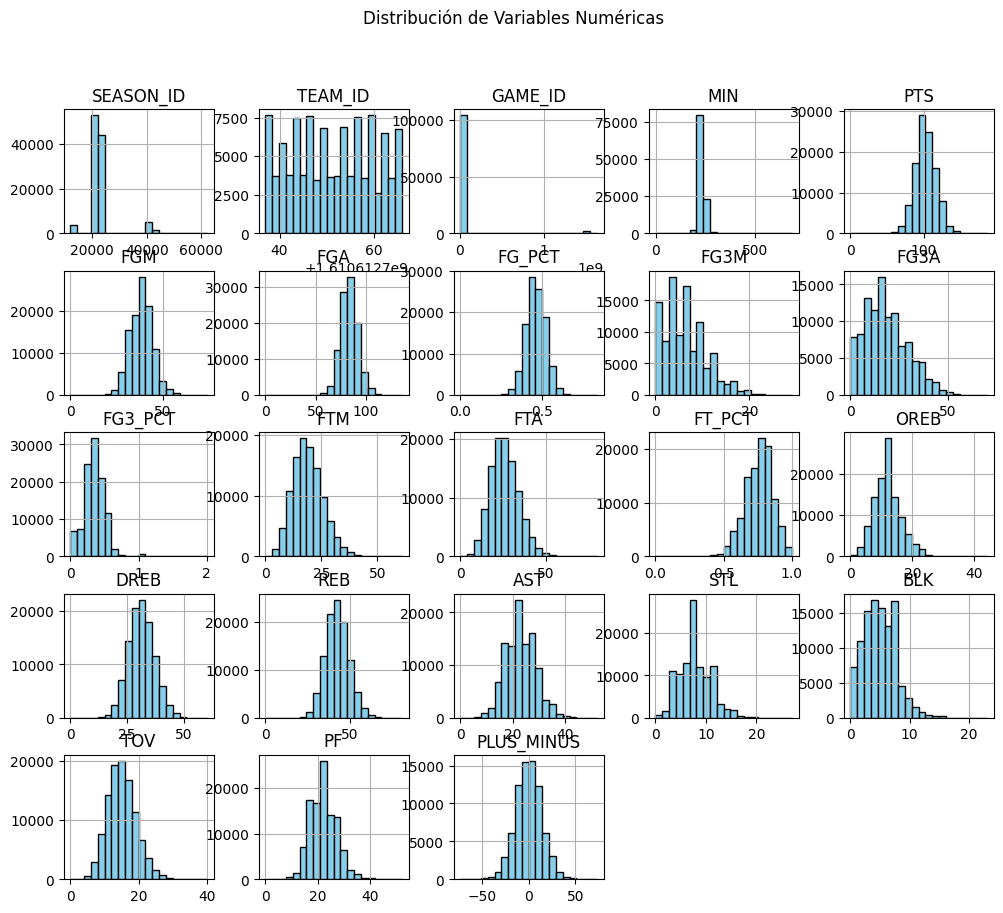

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para calcular y responder preguntas sobre estadísticas descriptivas de variables numéricas
def analisis_variables_numericas(df):
    """
    Responde a preguntas clave sobre variables numéricas utilizando estadísticas descriptivas y gráficos.
    """
    # Calcular estadísticas básicas de las variables numéricas
    print("Estadísticas Descriptivas de Variables Numéricas:\n")
    estadisticas = df.describe().T
    estadisticas['IQR'] = estadisticas['75%'] - estadisticas['25%']  # Rango Intercuartil (IQR)

    # Mostrar las estadísticas
    print(estadisticas[['mean', '50%', 'std', 'IQR']])

    # 1. Media, Mediana, Moda, Desviación Estándar
    print("\n1. Preguntas sobre Variables Numéricas:")

    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")
        media = df[col].mean()
        mediana = df[col].median()
        moda = df[col].mode()[0]
        desviacion = df[col].std()

        print(f"  Media: {media}")
        print(f"  Mediana: {mediana}")
        print(f"  Moda: {moda}")
        print(f"  Desviación Estándar: {desviacion}")

        # Pregunta: ¿Existen diferencias entre la media y la mediana?
        if abs(media - mediana) > 0.1 * media:
            print("  La media y la mediana difieren significativamente, indicando posible sesgo en la distribución.")
        else:
            print("  La media y la mediana son similares, lo que indica una distribución más simétrica.")

        # Pregunta: ¿Hay alguna variable con una desviación estándar muy alta?
        if desviacion > df[col].mean():
            print(f"  La desviación estándar es alta para la variable {col}, lo que indica gran dispersión en los datos.")

    # 2. Percentiles
    print("\n2. Percentiles:")
    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")
        percentiles = df[col].quantile([0.25, 0.5, 0.75])
        print(f"  Percentiles (25%, 50%, 75%): {percentiles.to_dict()}")

        # Pregunta: ¿Existen saltos grandes entre los percentiles?
        if percentiles[0.75] - percentiles[0.25] > 2 * (percentiles[0.5] - percentiles[0.25]):
            print("  Existe un salto significativo entre los percentiles, lo que podría indicar subgrupos o variabilidad inesperada.")

    # 3. Valores Atípicos (Outliers)
    print("\n3. Valores Atípicos (Outliers):")
    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")

        # Calcular los outliers basados en el IQR
        Q1 = estadisticas.at[col, '25%']
        Q3 = estadisticas.at[col, '75%']
        IQR = estadisticas.at[col, 'IQR']

        # Identificar los outliers
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        num_outliers = outliers.shape[0]

        print(f"  Número de outliers: {num_outliers}")

        # Pregunta: ¿Qué variables tienen valores atípicos?
        if num_outliers > 0:
            print(f"  La variable {col} tiene valores atípicos que podrían necesitar tratamiento.")

        # Pregunta: ¿Los outliers son errores en los datos o son puntos válidos?
        if num_outliers > 0:
            print(f"  Los valores atípicos en {col} deben ser investigados: ¿son errores o puntos válidos?")

    # Graficar histogramas para visualizar la distribución
    print("\nDistribución de las variables numéricas (Histogramas):")
    df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle('Distribución de Variables Numéricas')
    plt.show()

# Llamar la función con el DataFrame limpio
analisis_variables_numericas(df_limpio)


### <b> Preguntas de seguimiento </b>

1- ¿Qué tan frecuentemente ocurren los valores extremos de PLUS_MINUS? ¿Están distribuidos uniformemente o son casos aislados?

2- ¿Hay algún patrón en los equipos o situaciones específicas en las que se observan estos valores extremos (por ejemplo, partidos ganados o perdidos por grandes márgenes)?

3- ¿Deberíamos realizar una transformación en PLUS_MINUS para hacerla más simétrica y reducir su impacto en el modelo?

Total de valores extremos encontrados: 842
Frecuencia de los valores extremos:
PLUS_MINUS
 39.0    66
-39.0    62
 37.0    59
-37.0    55
 38.0    55
         ..
-55.0     1
 44.2     1
 69.0     1
 39.6     1
 61.0     1
Name: count, Length: 64, dtype: int64



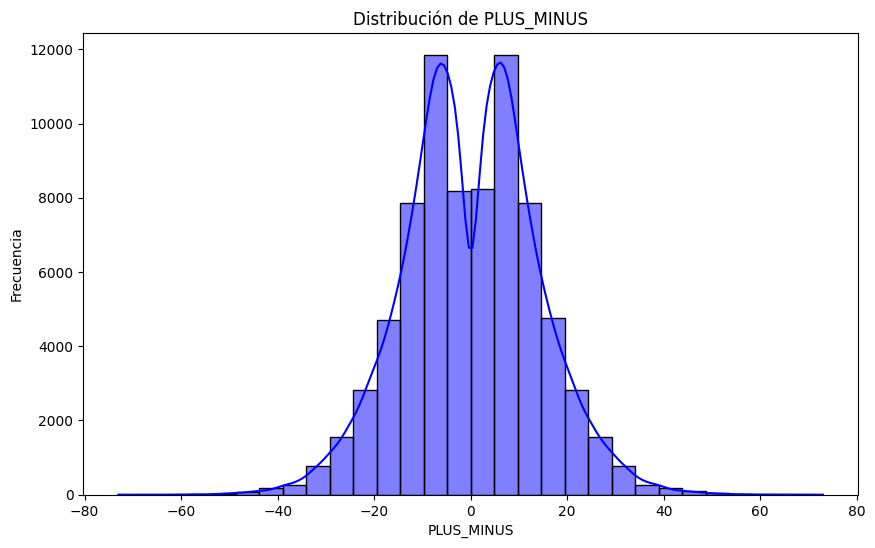

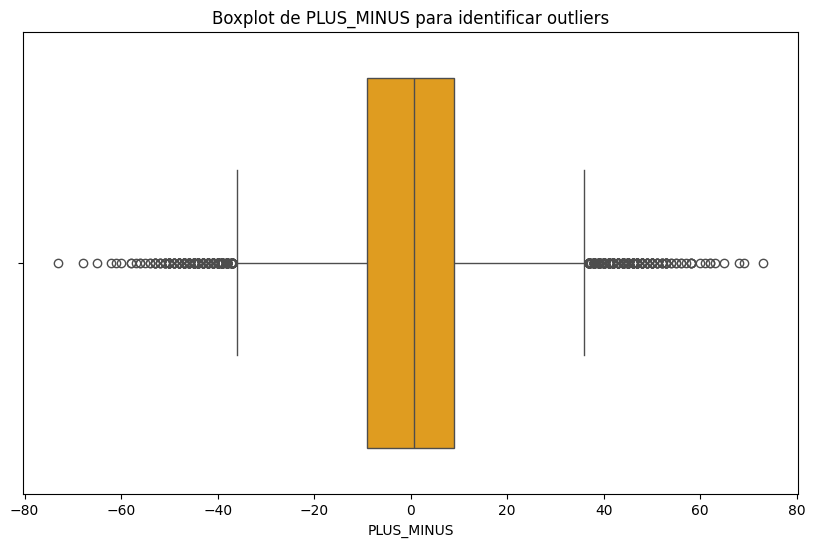

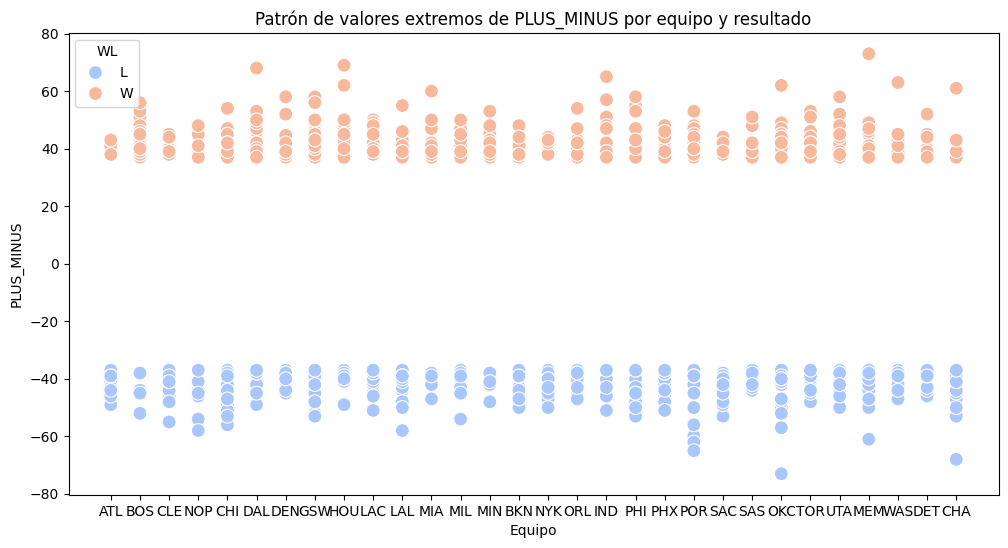

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


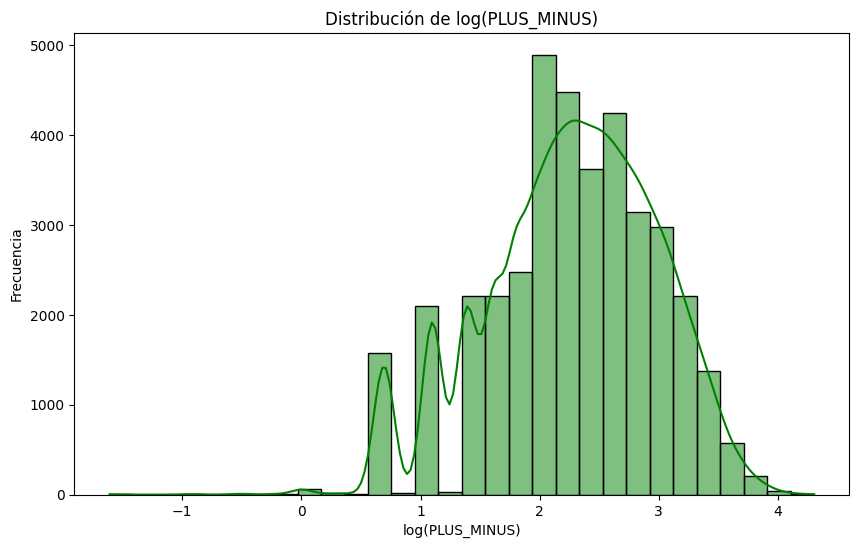

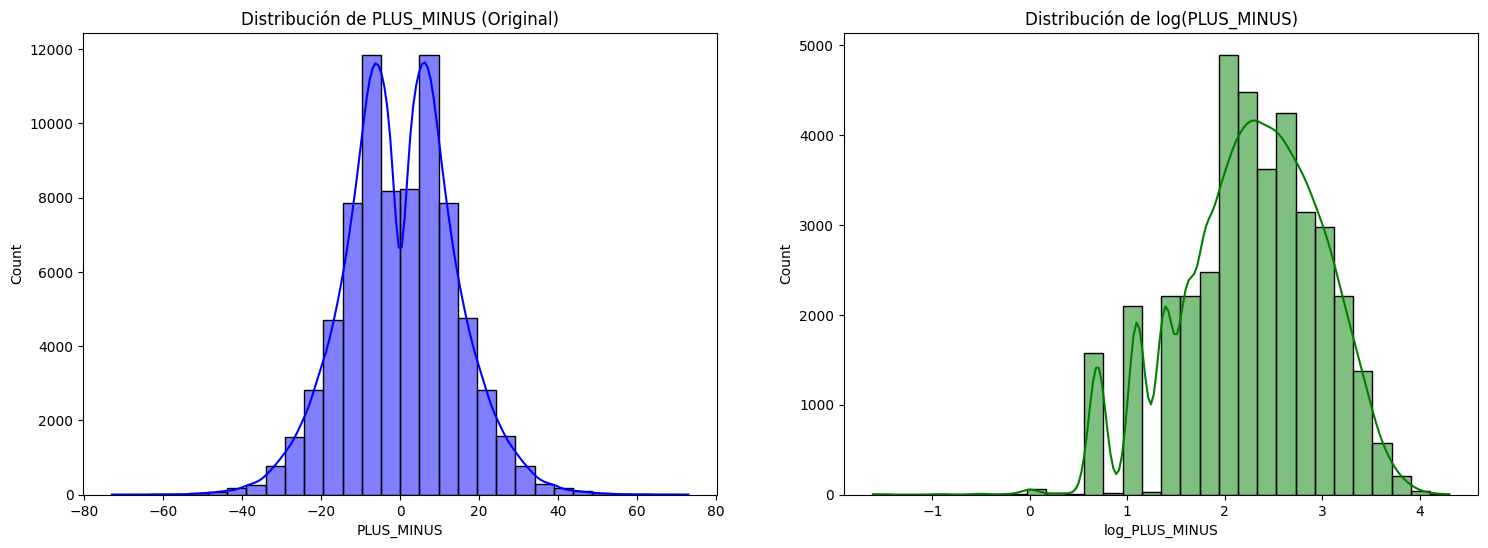

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_plus_minus(df):
    """
    Realiza un análisis detallado de la variable 'PLUS_MINUS' respondiendo a preguntas clave:
    - Frecuencia de valores extremos
    - Distribución de los valores
    - Posibles patrones con el resultado y equipo
    - Transformación para simetría

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'PLUS_MINUS'.

    Returns:
    None: Muestra gráficos y estadísticas.
    """

    # 1. Identificación de valores extremos usando el IQR
    Q1 = df['PLUS_MINUS'].quantile(0.25)
    Q3 = df['PLUS_MINUS'].quantile(0.75)
    IQR = Q3 - Q1
    limites_superior = Q3 + 1.5 * IQR
    limites_inferior = Q1 - 1.5 * IQR

    # Filtrar los valores extremos
    outliers = df[(df['PLUS_MINUS'] > limites_superior) | (df['PLUS_MINUS'] < limites_inferior)]

    print(f"Total de valores extremos encontrados: {len(outliers)}")
    print(f"Frecuencia de los valores extremos:\n{outliers['PLUS_MINUS'].value_counts()}\n")

    # 2. Visualización de la distribución de PLUS_MINUS
    plt.figure(figsize=(10, 6))
    sns.histplot(df['PLUS_MINUS'], kde=True, bins=30, color='blue')
    plt.title('Distribución de PLUS_MINUS')
    plt.xlabel('PLUS_MINUS')
    plt.ylabel('Frecuencia')
    plt.show()

    # 3. Identificación de los valores extremos: ¿Están distribuidos uniformemente o son casos aislados?
    # Graficar un boxplot para visualizar los outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['PLUS_MINUS'], color='orange')
    plt.title('Boxplot de PLUS_MINUS para identificar outliers')
    plt.xlabel('PLUS_MINUS')
    plt.show()

    # 4. Analizar si hay algún patrón en los equipos o resultados de los partidos con valores extremos
    outliers = df[(df['PLUS_MINUS'] > limites_superior) | (df['PLUS_MINUS'] < limites_inferior)]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=outliers['TEAM_ABBREVIATION'], y=outliers['PLUS_MINUS'], hue=outliers['WL'], palette='coolwarm', s=100)
    plt.title('Patrón de valores extremos de PLUS_MINUS por equipo y resultado')
    plt.xlabel('Equipo')
    plt.ylabel('PLUS_MINUS')
    plt.show()

    # 5. Probar transformación logarítmica para hacer PLUS_MINUS más simétrica
    df['log_PLUS_MINUS'] = np.log1p(df['PLUS_MINUS'])  # log1p maneja valores <= 0
    plt.figure(figsize=(10, 6))
    sns.histplot(df['log_PLUS_MINUS'], kde=True, bins=30, color='green')
    plt.title('Distribución de log(PLUS_MINUS)')
    plt.xlabel('log(PLUS_MINUS)')
    plt.ylabel('Frecuencia')
    plt.show()

    # Comparar distribución antes y después de la transformación
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    sns.histplot(df['PLUS_MINUS'], kde=True, bins=30, color='blue', ax=axes[0])
    axes[0].set_title('Distribución de PLUS_MINUS (Original)')
    sns.histplot(df['log_PLUS_MINUS'], kde=True, bins=30, color='green', ax=axes[1])
    axes[1].set_title('Distribución de log(PLUS_MINUS)')

    plt.show()

# Llamar la función con el DataFrame df_limpio
analizar_plus_minus(df_limpio)


### ¿contribuye Log(PLUS_MINUS)?

Media de log(PLUS_MINUS): 2.27
Moda de log(PLUS_MINUS): 2.08
Desviación estándar de log(PLUS_MINUS): 0.71
Prueba Shapiro-Wilk para log(PLUS_MINUS): p = 1.7997008686614708e-53


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38416.
  res = hypotest_fun_out(*samples, **kwds)


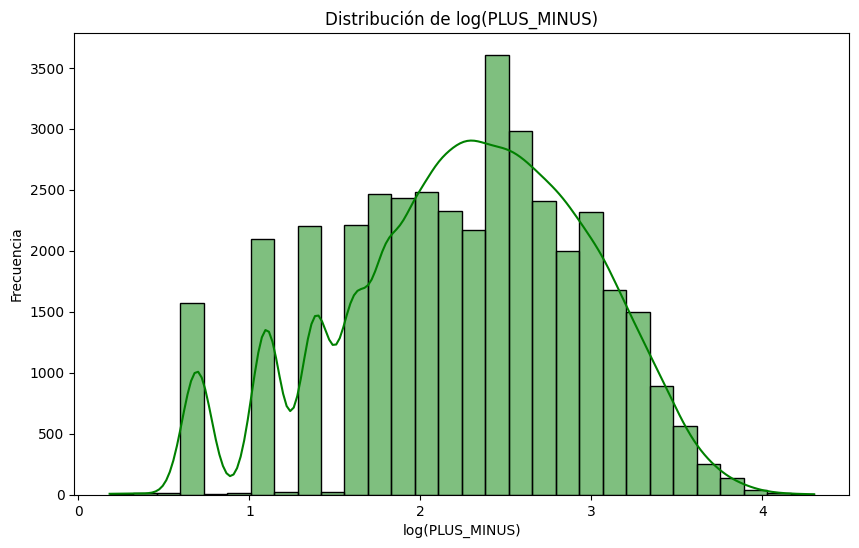

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analizar_plus_minus(df):
    """
    Realiza el análisis de la variable 'PLUS_MINUS' y de su distribución logarítmica.
    Calcula y muestra estadísticas de la distribución log(PLUS_MINUS), incluyendo
    la media, moda, desviación estándar y realiza la prueba de Shapiro-Wilk.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'PLUS_MINUS'.

    Returns:
    None: Muestra las estadísticas y resultados de la prueba de normalidad.
    """

    # Filtrar valores de 'PLUS_MINUS' que sean mayores que 0 antes de aplicar la transformación logarítmica
    df_filtrado = df[df['PLUS_MINUS'] > 0].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

    # 1. Aplicar la transformación logarítmica
    df_filtrado.loc[:, 'log_PLUS_MINUS'] = np.log1p(df_filtrado['PLUS_MINUS'])  # Usar .loc[] para modificar

    # 2. Cálculo de la media, moda y desviación estándar de log(PLUS_MINUS)
    media_log = df_filtrado['log_PLUS_MINUS'].mean()
    moda_log = df_filtrado['log_PLUS_MINUS'].mode()[0]  # `.mode()` devuelve una Serie, tomamos el primer valor
    desviacion_log = df_filtrado['log_PLUS_MINUS'].std()

    # Mostrar las estadísticas
    print(f"Media de log(PLUS_MINUS): {media_log:.2f}")
    print(f"Moda de log(PLUS_MINUS): {moda_log:.2f}")
    print(f"Desviación estándar de log(PLUS_MINUS): {desviacion_log:.2f}")

    # 3. Prueba de normalidad: Shapiro-Wilk para log(PLUS_MINUS)
    stat_log, p_log = stats.shapiro(df_filtrado['log_PLUS_MINUS'].dropna())
    print(f"Prueba Shapiro-Wilk para log(PLUS_MINUS): p = {p_log}")

    # 4. Visualización de la distribución de log(PLUS_MINUS)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtrado['log_PLUS_MINUS'], kde=True, bins=30, color='green')
    plt.title('Distribución de log(PLUS_MINUS)')
    plt.xlabel('log(PLUS_MINUS)')
    plt.ylabel('Frecuencia')
    plt.show()

# Llamar la función con el DataFrame df_limpio
analizar_plus_minus(df_limpio)



---

# **Análisis de Distribuciones de las Variables**

El objetivo de esta fase es entender cómo se distribuyen las variables de nuestro dataset. Con esta información, podemos determinar si necesitamos realizar alguna transformación (como una transformación logarítmica o normalización) para mejorar el desempeño del modelo de predicción.

#### **Pasos a seguir:**

1. **Visualización de la distribución de variables numéricas:**
   - **¿Qué se busca?**  
     Se busca observar cómo se distribuyen las variables numéricas del conjunto de datos. En particular, se analizarán las variables como `PTS`, `REB`, `AST`, y `PLUS_MINUS` para identificar si siguen una distribución normal o si tienen sesgo.
     
   - **Métodos:**
     - **Histogramas**: Muestran la frecuencia de los valores en diferentes intervalos, lo que permite observar si la distribución es normal, sesgada o tiene múltiples picos.
     - **Curvas de densidad (KDE)**: Complementan a los histogramas al mostrar una curva suave que representa la densidad de probabilidad de los valores.

2. **Detección de valores atípicos (outliers):**
   - **¿Qué se busca?**  
     Identificar si existen valores atípicos en las variables `PLUS_MINUS`, `PTS`, y `REB`, que podrían influir en los resultados del modelo. Los outliers son puntos de datos que están muy alejados de la mayoría de los otros puntos.
     
   - **Métodos:**
     - **Boxplots**: Este gráfico muestra la mediana, cuartiles y valores atípicos (outliers) de una variable. Un boxplot ayudará a detectar estos valores fuera del rango esperado.

3. **Análisis de variables categóricas:**
   - **¿Qué se busca?**  
     Ver cómo se distribuyen las categorías en las variables como `WL` (si ganó o perdió el partido) y `MATCHUP` (enfrentamiento del equipo). Es importante entender la frecuencia de las victorias, derrotas y los enfrentamientos para interpretar correctamente los resultados.
     
   - **Métodos:**
     - **Gráficos de barras**: Se utilizarán gráficos de barras para mostrar la frecuencia de cada categoría en las variables categóricas. Esto ayudará a entender cómo se distribuyen las victorias y derrotas (`WL`) y los enfrentamientos (`MATCHUP`).

4. **¿Por qué es importante este análisis?**
   - **Identificación de distribuciones sesgadas**: Si algunas variables presentan distribuciones muy sesgadas (como una distribución log-normal o sesgo a la derecha), podríamos necesitar aplicar transformaciones logarítmicas o técnicas de normalización.
   - **Impacto de los valores atípicos**: Los valores atípicos pueden distorsionar el rendimiento de los modelos, especialmente los modelos basados en distancias como KNN o los modelos de regresión. Detectar estos outliers es crucial.
   - **Selección de variables relevantes**: Un análisis adecuado de las variables categóricas y su distribución permite asegurarse de que las variables sean representativas para la predicción, y ayudará a tomar decisiones sobre cuáles son más relevantes para el modelo.

---

### **Métodos y Visualización**

1. **Histogramas y KDE**
   - **Objetivo**: Identificar la forma de la distribución de las variables numéricas.
   - **Método**: Crear histogramas para cada variable numérica y superponer una curva de densidad (KDE) para visualizar la distribución.
   - **Interpretación**: Si la distribución es normal, se podría usar el modelo tal cual. Si es asimétrica, es posible que se necesiten transformaciones.

2. **Boxplots**
   - **Objetivo**: Detectar posibles outliers en las variables numéricas.
   - **Método**: Utilizar boxplots para visualizar la mediana, los cuartiles y los valores atípicos.
   - **Interpretación**: Si existen outliers, evaluaremos si es conveniente eliminarlos o usar técnicas robustas.

3. **Gráficos de Barras**
   - **Objetivo**: Ver cómo se distribuyen las categorías en variables como `WL` y `MATCHUP`.
   - **Método**: Crear gráficos de barras para visualizar la frecuencia de las categorías de estas variables.
   - **Interpretación**: Esto permitirá entender cuántos partidos se ganaron, cuántos se perdieron y qué tan equilibrados están los enfrentamientos.

---

### **Preguntas que queremos responder:**

- **¿Las variables numéricas tienen distribuciones normales?**
  Esto nos permitirá decidir si podemos aplicar un modelo de regresión lineal o si necesitamos hacer transformaciones.
  
- **¿Existen outliers significativos en las variables numéricas?**
  Si los outliers son extremos y no representan casos reales, podrían afectar la precisión del modelo. En este caso, podríamos necesitar eliminarlos o usar un modelo robusto.

- **¿Cómo se distribuyen las categorías en las variables `WL` y `MATCHUP`?**
  Esto nos ayudará a entender cómo están distribuidos los resultados del partido y qué tan frecuente es cada enfrentamiento, lo cual es importante para predecir el resultado de un partido.

---

### **Resultado Esperado**

Al final de este análisis, deberíamos obtener una comprensión más clara de las características de las variables en el conjunto de datos. Esta información será útil para decidir si se necesitan transformaciones adicionales en los datos antes de construir un modelo de predicción de victorias y derrotas (modelo de clasificación). Además, la identificación de outliers y la exploración de la distribución de las variables permitirá asegurar que el modelo sea lo más preciso posible.

---

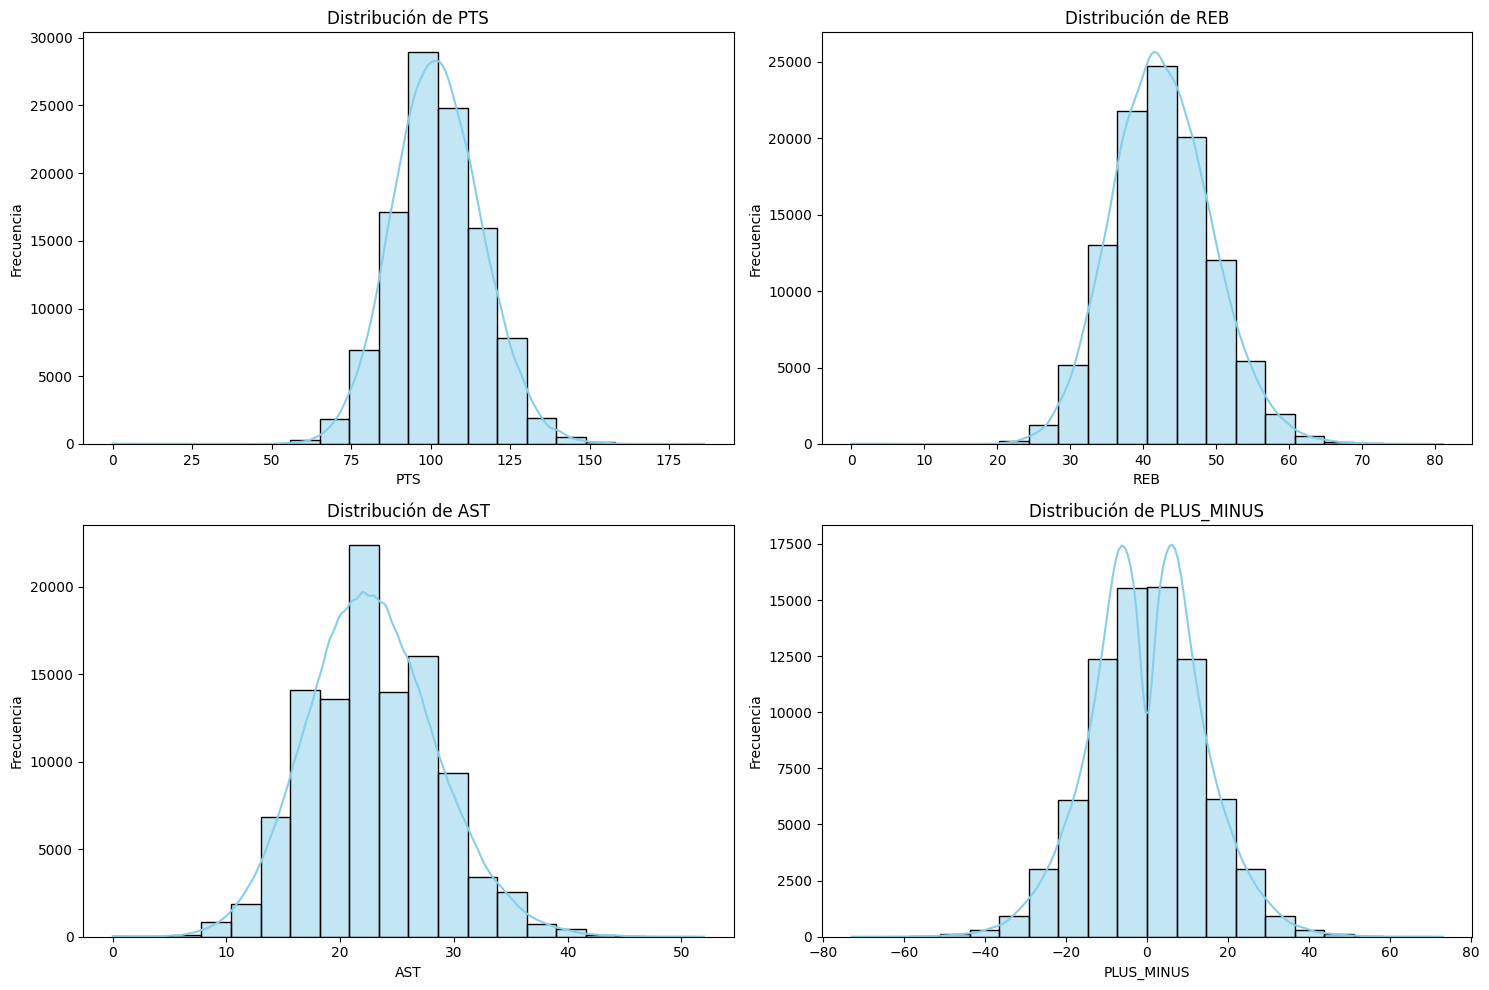

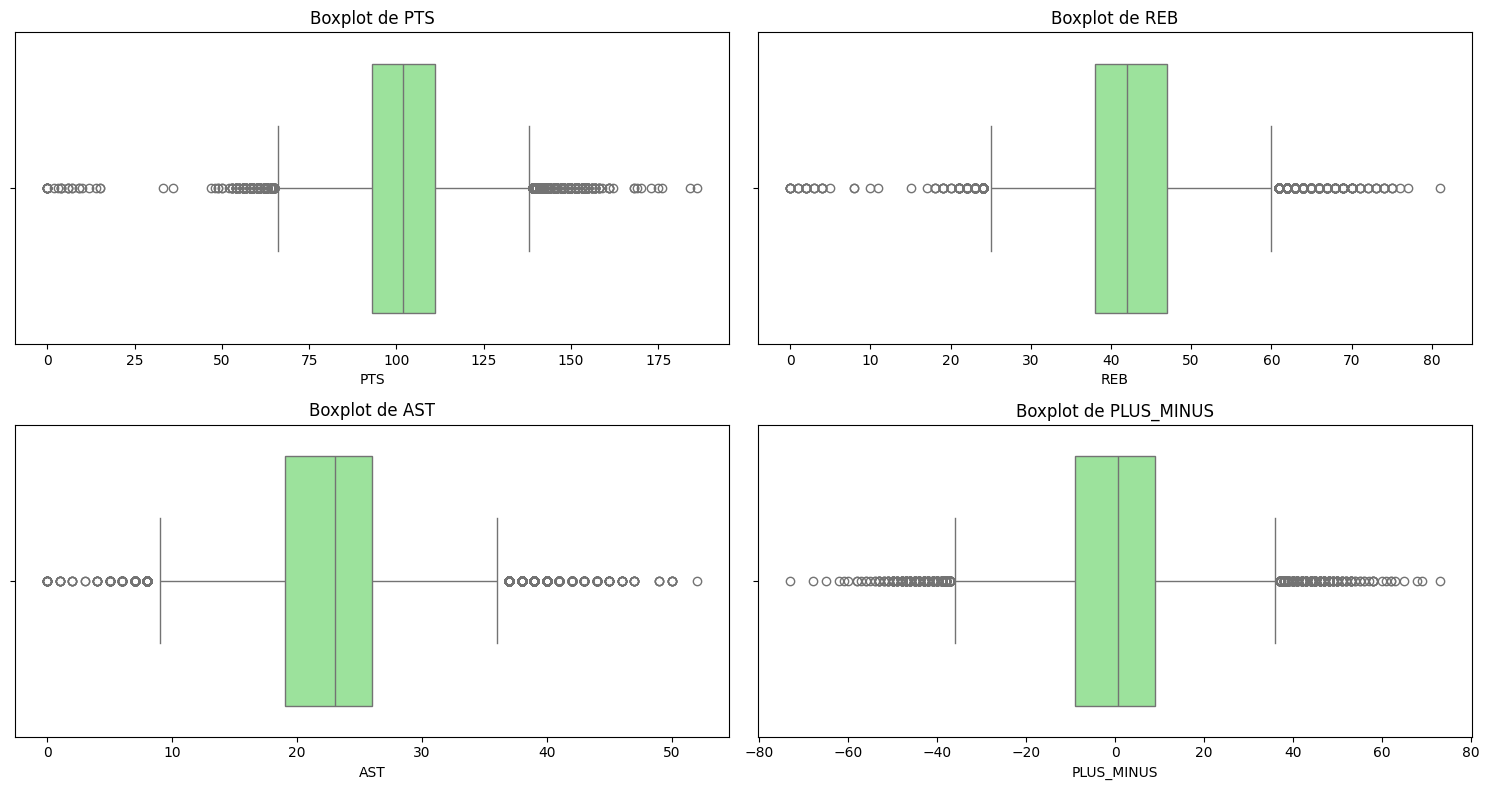

<ipython-input-56-97542e182646>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_limpio[col], palette='pastel')
<ipython-input-56-97542e182646>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_limpio[col], palette='pastel')


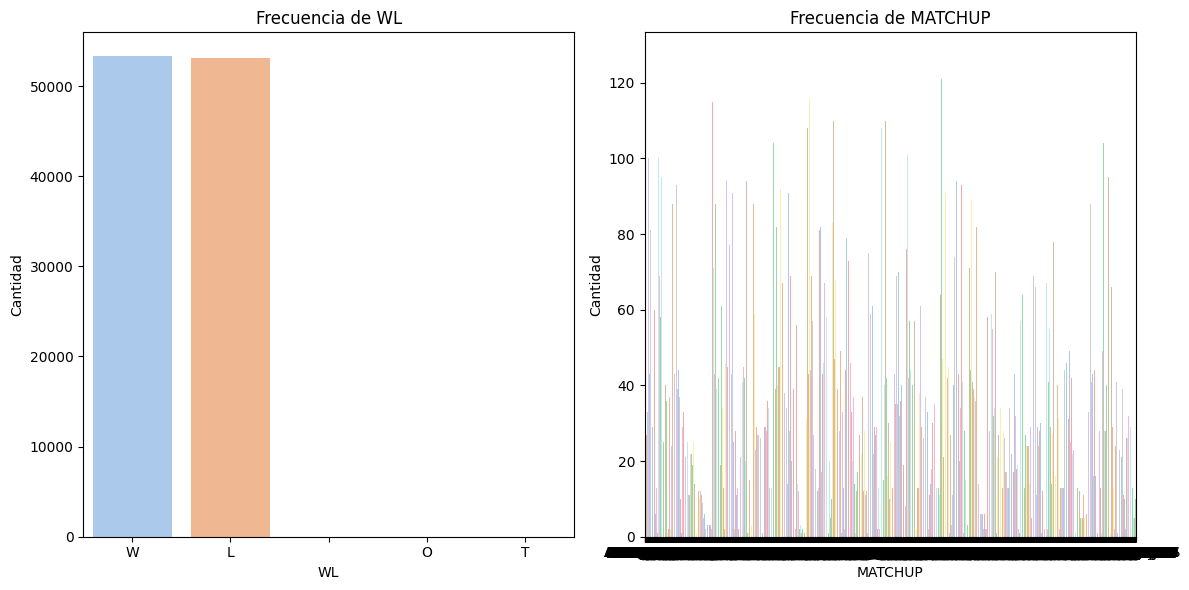

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Asegúrate de que el dataframe 'df_limpio' esté cargado previamente

# Variables numéricas para análisis de distribuciones
numerical_columns = ['PTS', 'REB', 'AST', 'PLUS_MINUS']

# 1. Visualización de Histogramas y KDE (Density Plots) para las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_limpio[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Boxplots para detectar outliers en las variables numéricas
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_limpio[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



# 3. Gráficos de barras para las variables categóricas
categorical_columns = ['WL', 'MATCHUP']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df_limpio[col], palette='pastel')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Asegurarse de que estamos trabajando solo con las columnas numéricas
numerical_columns = df_limpio.select_dtypes(include=['float64', 'int64']).columns

# Aplicar la prueba de normalidad de Shapiro-Wilk a cada variable numérica
normality_results = {}

for column in numerical_columns:
    data = df_limpio[column].dropna()  # Eliminar valores nulos
    stat, p_value = shapiro(data)

    # Evaluar si se rechaza o no la hipótesis nula (p < 0.05)
    if p_value < 0.05:
        normality_results[column] = {'Statistic': stat, 'p_value': p_value, 'Reject Null Hypothesis': 'No'}
    else:
        normality_results[column] = {'Statistic': stat, 'p_value': p_value, 'Reject Null Hypothesis': 'Yes'}

# Crear un DataFrame con los resultados
normality_df = pd.DataFrame(normality_results).T

# Mostrar los resultados
print(normality_df)


               Statistic p_value Reject Null Hypothesis
SEASON_ID       0.377071     0.0                     No
TEAM_ID          0.95488     0.0                     No
GAME_ID         0.156296     0.0                     No
MIN             0.353006     0.0                     No
PTS             0.995671     0.0                     No
FGM             0.994519     0.0                     No
FGA             0.989001     0.0                     No
FG_PCT          0.998918     0.0                     No
FG3M            0.948714     0.0                     No
FG3A            0.968235     0.0                     No
FG3_PCT         0.961023     0.0                     No
FTM             0.986241     0.0                     No
FTA             0.988466     0.0                     No
FT_PCT          0.992315     0.0                     No
OREB            0.979695     0.0                     No
DREB            0.995057     0.0                     No
REB             0.994757     0.0                

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 106488.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76784.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40075.
  res = hypotest_fun_out(*samples, **kwds)


### <b>¿Qué significa esto para la selección de modelos? </b>
- Con los resultados de la prueba de normalidad, ahora podemos pensar en qué tipo de modelos utilizar y cómo manejar las distribuciones no normales:

<b>Modelos que no asumen normalidad:</b>

- Dado que muchas de las variables no siguen una distribución normal, es recomendable usar modelos que no asumen normalidad o que son robustos frente a estas situaciones.

1. Modelos de árboles (como Random Forest o Gradient Boosting): Son adecuados porque no requieren que las variables sigan una distribución normal. Estos modelos pueden manejar bien datos con distribuciones sesgadas o no normales.

2. Modelos de Regresión Logística: Si el objetivo es predecir una variable binaria como la victoria o derrota (WL), un modelo de regresión logística puede ser útil. Aunque la regresión logística no asume normalidad, es más sensible a los outliers, por lo que se deben revisar otras condiciones, como la multicolinealidad y la homocedasticidad.

3. Redes neuronales (Deep Learning): Al ser modelos flexibles, las redes neuronales pueden manejar bien distribuciones no normales. Sin embargo, requieren más datos y recursos computacionales.

# Análisis de Relaciones

#### Objetivo:
El objetivo de este análisis es explorar la relación entre las variables numéricas del dataset y cómo estas se asocian con la variable objetivo `WL` (que indica si el equipo ganó o perdió). Además, se buscarán posibles problemas de multicolinealidad entre las variables predictoras para evitar redundancia en el modelo. Esto ayudará a identificar las variables más relevantes para predecir el resultado del partido y posibles transformaciones necesarias.

#### Componentes del Análisis:

1. **Correlación entre variables numéricas**:
   - **Matriz de Correlación**:
     - Se calculará la matriz de correlación utilizando el coeficiente de **Pearson** o **Spearman**, dependiendo de si se trata de relaciones lineales o monotónicas. Esto ayudará a entender qué tan fuerte es la relación entre las variables numéricas del dataset.
     - La correlación de **Pearson** mide la relación lineal entre las variables, mientras que la de **Spearman** es útil para relaciones monotónicas (sin importar si son lineales o no).
     - Específicamente, se buscará identificar relaciones altas entre variables como `PTS`, `FGM`, `FTM` (puntos anotados, tiros de campo, tiros libres), ya que estas pueden estar relacionadas entre sí.
   
   - **Multicolinealidad**:
     - Se revisará si existe **multicolinealidad** entre las variables predictoras. Por ejemplo, si `PTS` está altamente correlacionado con `FGM` y `FTM`, podría haber redundancia en la información proporcionada por estas variables, lo que podría afectar la capacidad del modelo para hacer predicciones precisas.
     - Para detectar multicolinealidad, se puede calcular el **VIF (Variance Inflation Factor)**, que evalúa cuánto se inflan las varianzas de los coeficientes de regresión debido a la colinealidad entre las variables.

2. **Relación con la variable objetivo (`WL`)**:
   - **Gráficos de dispersión o violin plots**:
     - Se utilizarán **gráficos de dispersión** o **violin plots** para visualizar cómo las variables numéricas (por ejemplo, `PTS`, `PLUS_MINUS`) se distribuyen en función de la variable objetivo `WL` (si el equipo ganó o perdió). Esto ayudará a identificar patrones y tendencias en los datos.
   
   - **Pruebas estadísticas (ANOVA o t-test)**:
     - Se realizarán pruebas estadísticas, como el **t-test** para dos grupos (victoria y derrota) o **ANOVA** si hay más de dos categorías, para evaluar si las diferencias entre las variables clave (por ejemplo, `PTS`, `PLUS_MINUS`) son estadísticamente significativas entre los partidos ganados y perdidos.
     - El **t-test** compara las medias de dos grupos (por ejemplo, el promedio de `PTS` en partidos ganados vs perdidos) para determinar si las diferencias observadas son lo suficientemente grandes como para ser significativas.
     - **ANOVA** se usaría si se tuviera que comparar más de dos grupos (por ejemplo, si se segmentan los partidos por diferentes rangos de `PTS` o `PLUS_MINUS`).

#### ¿Por qué es importante este análisis?
- **Identificación de Variables Relevantes**:
  - Identificar qué variables están más fuertemente correlacionadas con la victoria (`WL`) y cuáles tienen poca relación con ella. Esto permitirá seleccionar las características más relevantes para el modelo de predicción.
  
- **Manejo de Multicolinealidad**:
  - Detectar y eliminar o combinar variables altamente correlacionadas puede mejorar la precisión del modelo, ya que la multicolinealidad puede generar problemas en la estimación de los coeficientes de los modelos estadísticos, como la regresión lineal.
  
- **Mejor Comprensión de los Datos**:
  - Conocer las relaciones entre las variables ayuda a comprender mejor el comportamiento de los partidos, lo que a su vez mejora la construcción y la interpretación del modelo predictivo.

Este análisis proporcionará una base sólida para decidir qué variables utilizar, cómo preprocesarlas y qué modelos pueden ser los más adecuados para predecir el resultado de los partidos.




### 1. Correlación entre variables numéricas

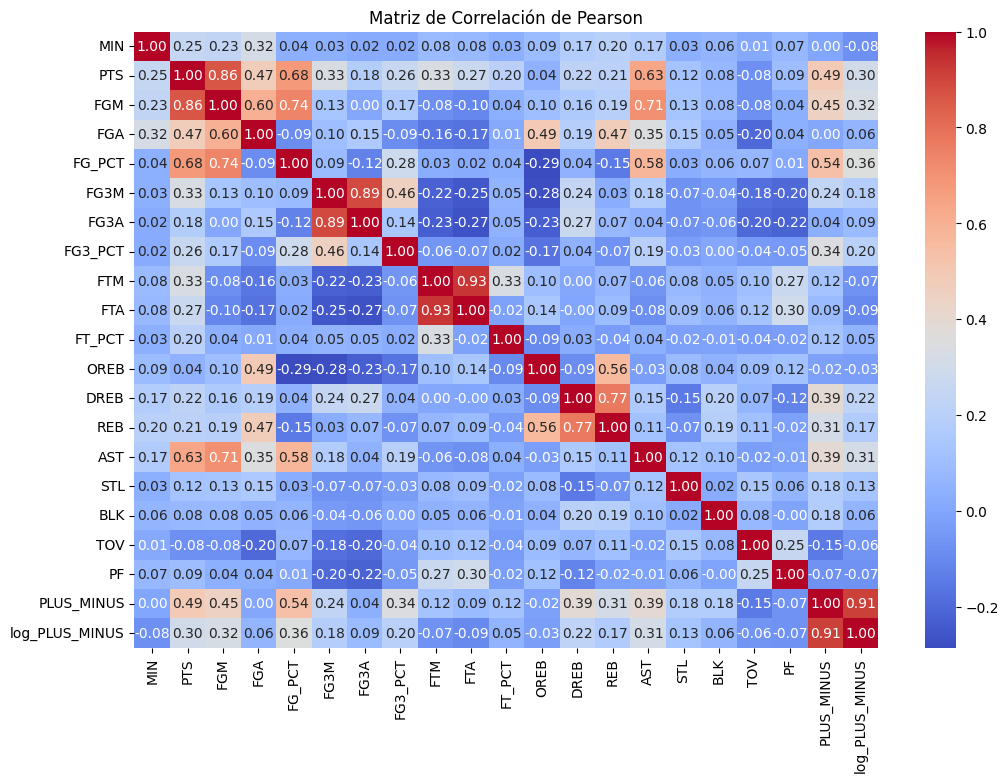

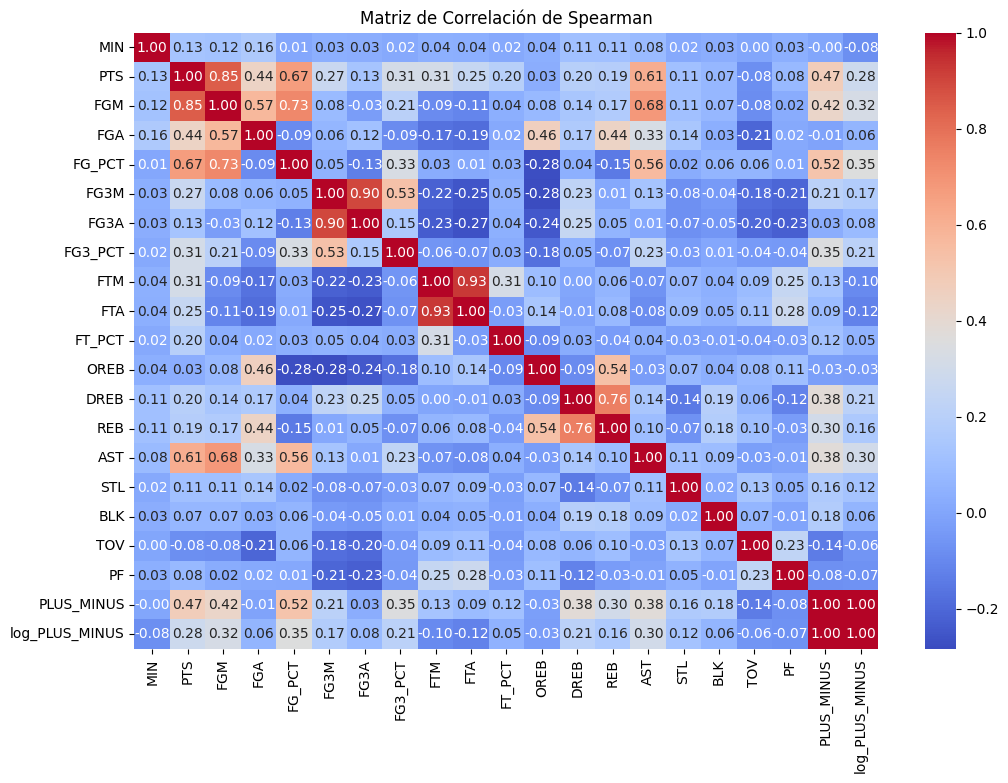

Correlaciones altas entre PTS, FGM y FTM:
                      PTS       FGM       FTM
PTS             1.000000  0.861845  0.327404
FGM             0.861845  1.000000 -0.084357
FG_PCT          0.676790  0.740217  0.028635
AST             0.633639  0.705826 -0.061697
PLUS_MINUS      0.488179  0.446047  0.123600
FGA             0.472021  0.599112 -0.157192
FG3M            0.329199  0.132390 -0.221906
FTM             0.327404 -0.084357  1.000000
log_PLUS_MINUS  0.299941  0.322914 -0.071089
FTA             0.267065 -0.104538  0.930879
FG3_PCT         0.260998  0.165477 -0.057430
MIN             0.250780  0.234510  0.082960
DREB            0.217268  0.159651  0.004853
REB             0.207132  0.194091  0.067659
FT_PCT          0.203774  0.037055  0.329093
FG3A            0.177000  0.003144 -0.234658
STL             0.123307  0.128325  0.077881
PF              0.093334  0.035363  0.268020
BLK             0.075232  0.078648  0.045893
OREB            0.042171  0.096981  0.099656
TOV         

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas y eliminar las columnas no relevantes
df_numericas = df_limpio.select_dtypes(include=['number'])

# Eliminar las columnas 'SEASON_ID', 'TEAM_ID' y 'GAME_ID'
df_numericas = df_numericas.drop(columns=['SEASON_ID', 'TEAM_ID', 'GAME_ID'], errors='ignore')

# Calcular la matriz de correlación de Pearson
correlation_pearson = df_numericas.corr(method='pearson')

# Calcular la matriz de correlación de Spearman
correlation_spearman = df_numericas.corr(method='spearman')

# Graficar la matriz de correlación de Pearson
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Graficar la matriz de correlación de Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Spearman')
plt.show()

# Mostrar las correlaciones altas entre las variables relevantes (por ejemplo, PTS, FGM, FTM)
correlation_high = correlation_pearson[['PTS', 'FGM', 'FTM']].sort_values(by='PTS', ascending=False)
print("Correlaciones altas entre PTS, FGM y FTM:\n", correlation_high)


####  <b> Observaciones clave: </b>
1. **Correlación entre `PTS` y `FGM` (0.87)**:
   - **Alto valor positivo**: La correlación entre los puntos anotados (`PTS`) y los tiros de campo hechos (`FGM`) es bastante alta (0.87). Esto sugiere que un aumento en los tiros de campo hechos tiende a estar fuertemente relacionado con un aumento en los puntos anotados. Esto tiene sentido, ya que más tiros de campo exitosos deberían resultar en más puntos.

2. **Correlación entre `PTS` y `FTM` (0.30)**:
   - **Moderada correlación positiva**: La relación entre `PTS` y los tiros libres hechos (`FTM`) es más débil (0.30). Esto indica que aunque los tiros libres contribuyen a los puntos anotados, su impacto es menos fuerte comparado con los tiros de campo. Aún así, un aumento en los tiros libres realizados tiende a estar asociado con un aumento en los puntos anotados.

3. **Correlación entre `FGM` y `FTM` (-0.09)**:
   - **Correlación negativa muy baja**: La correlación entre los tiros de campo hechos (`FGM`) y los tiros libres hechos (`FTM`) es negativa, pero extremadamente baja (-0.09). Esto sugiere que no hay una relación significativa entre el número de tiros de campo exitosos y los tiros libres. Podría ser que un jugador anote más tiros de campo sin necesariamente hacer muchos tiros libres, o viceversa, lo cual puede depender de varios factores en un juego (por ejemplo, estilo de juego, la defensa del equipo contrario).

### Otras observaciones importantes:
- **Variables relacionadas con `PTS`, `FGM` y `FTM`**:
  - `FG_PCT` (porcentaje de tiros de campo): Muestra una correlación significativa tanto con `PTS` (0.71) como con `FGM` (0.78), lo que indica que el porcentaje de tiros de campo es un buen indicador de la efectividad de un jugador, y está fuertemente relacionado con ambos.
  - `FTA` (intentos de tiro libre): Muestra una alta correlación con `FTM` (0.93), lo que tiene sentido porque los intentos de tiro libre y los tiros libres realizados suelen estar muy relacionados.

- **Variables con bajas correlaciones**:
  - Variables como `STL` (robos), `BLK` (bloqueos), y `REB` (rebotes) tienen correlaciones bajas con `PTS`, `FGM` y `FTM`. Esto sugiere que estas estadísticas pueden no estar tan estrechamente relacionadas con los puntos anotados en este conjunto de datos, aunque pueden ser relevantes en otros contextos (por ejemplo, contribuyen al rendimiento general del equipo).

### Recomendaciones para el modelo:
- **Variables con alta correlación (como `PTS` y `FGM`)**: Deberías considerar incluir estas variables en tu modelo para predecir el resultado del partido o `WL`, ya que tienen una relación fuerte.
- **Tener cuidado con la multicolinealidad**: Las variables `FGM`, `FG_PCT` y `PTS` tienen relaciones altas entre sí, lo que podría introducir multicolinealidad en los modelos de regresión. Podrías considerar elegir solo una de estas variables si estás construyendo un modelo de regresión lineal.
- **Otras variables a considerar**: Variables como `FTM` y `FTA` también podrían ser útiles, pero la baja correlación entre algunas de las variables y `PTS` sugiere que el modelo podría ser más robusto si se priorizan las variables con relaciones más fuertes.

Este análisis te ayuda a comprender las interacciones entre las variables y cómo podrían influir en los resultados que deseas predecir.

## Multicolinealidad
- <b> Calculo del VIF  </b>

Procedimiento para detectar multicolinealidad:
VIF (Variance Inflation Factor): El VIF mide cuánto se incrementa la varianza de un coeficiente de regresión debido a la colinealidad con otras variables. Un valor alto de VIF (generalmente mayor a 10) sugiere que una variable está altamente correlacionada con otras y, por lo tanto, podría ser redundante.

In [ ]:
df_limpio.isnull().sum()

,0
SEASON_ID,0
TEAM_ID,0
TEAM_ABBREVIATION,0
TEAM_NAME,0
GAME_ID,0
GAME_DATE,0
MATCHUP,0
WL,0
MIN,0
PTS,0


In [ ]:
pip install fancyimpute


In [ ]:
from fancyimpute import IterativeImputer

# Aplicar MICE para imputar los valores faltantes
imputer = IterativeImputer()
df_limpio[['PLUS_MINUS']] = imputer.fit_transform(df_limpio[['PLUS_MINUS']])


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Seleccionamos solo las variables numéricas (sin las que no queremos considerar, como SEASON_ID, TEAM_ID, GAME_ID)
numerical_columns = df_limpio.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Eliminamos las variables no deseadas (SEASON_ID, TEAM_ID, GAME_ID)
numerical_columns.remove('SEASON_ID')
numerical_columns.remove('TEAM_ID')
numerical_columns.remove('GAME_ID')
numerical_columns.remove('log_PLUS_MINUS')

# Asegurarnos de que no haya valores nulos o infinitos en los datos
df_limpio_clean = df_limpio[numerical_columns]

# Reemplazamos los valores NaN con la mediana de cada columna, o podrías usar otra estrategia como la media
df_limpio_clean = df_limpio_clean.fillna(df_limpio_clean.median())

# Reemplazamos los valores infinitos con el valor máximo o mínimo de cada columna (dependiendo del contexto)
df_limpio_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_limpio_clean.fillna(df_limpio_clean.max(), inplace=True)  # Rellenamos NaN con el valor máximo de cada columna

# Agregamos una constante para el cálculo del VIF
X = df_limpio_clean
X = add_constant(X)

# Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos los resultados
vif_data


,Variable,VIF
0,const,4888.864837
1,MIN,1.213685
2,PTS,706036.202206
3,FGM,521487.415623
4,FGA,52.124719
5,FG_PCT,70.037385
6,FG3M,72274.284333
7,FG3A,10.499394
8,FG3_PCT,2.239553
9,FTM,156577.061897


#### ¿Qué significa esto?
Variables con inf en el VIF: Estas variables (PTS, FGM, FG3M, FTM) están altamente correlacionadas entre sí. Esto significa que los valores de una de ellas pueden predecir bien los valores de las otras. Esto genera redundancia en el modelo y puede afectar la capacidad del modelo para estimar correctamente los coeficientes de regresión.

<b>Acción sugerida: Para mejorar el modelo, es recomendable:</b>

Eliminar algunas de estas variables redundantes. Por ejemplo, si PTS está altamente correlacionado con FGM y FTM, puedes considerar eliminar una o más de estas variables.
Combinar variables: En lugar de mantener múltiples variables altamente correlacionadas, podrías combinar algunas de ellas de manera significativa, por ejemplo, sumando o promediando FGM y FTM si ambos representan aspectos similares del juego.
Otras variables con VIF alto:
FGA (59.06), FG_PCT (98.62), FTA (62.56), OREB (43.13), DREB (71.15), y REB (101.25) también tienen valores de VIF elevados, lo que indica que pueden estar correlacionadas con otras variables. Es útil investigar más a fondo estas relaciones.

#  Análisis Contextual
Análisis por equipo (TEAM_ABBREVIATION):
¿Qué equipos tienen tendencias más claras a ganar o perder?
Comparar métricas clave (PTS, REB, AST) por equipo.
Análisis por localía/visitante (MATCHUP):
Dividir el dataset en partidos locales y visitantes. Verificar si la localía afecta variables como PLUS_MINUS o WL.
Análisis temporal (GAME_DATE):
Evaluar si hay patrones temporales en el rendimiento del equipo (por ejemplo, rachas ganadoras o decrecimiento a lo largo de la temporada).
¿Por qué? Esto permite incorporar el contexto en el modelo y diseñar mejores características (features).



## Análisis por equipo (TEAM_ABBREVIATION)
Objetivo: Comparar las métricas clave (PTS, REB, AST) por equipo para identificar qué equipos tienen tendencias más claras a ganar o perder.


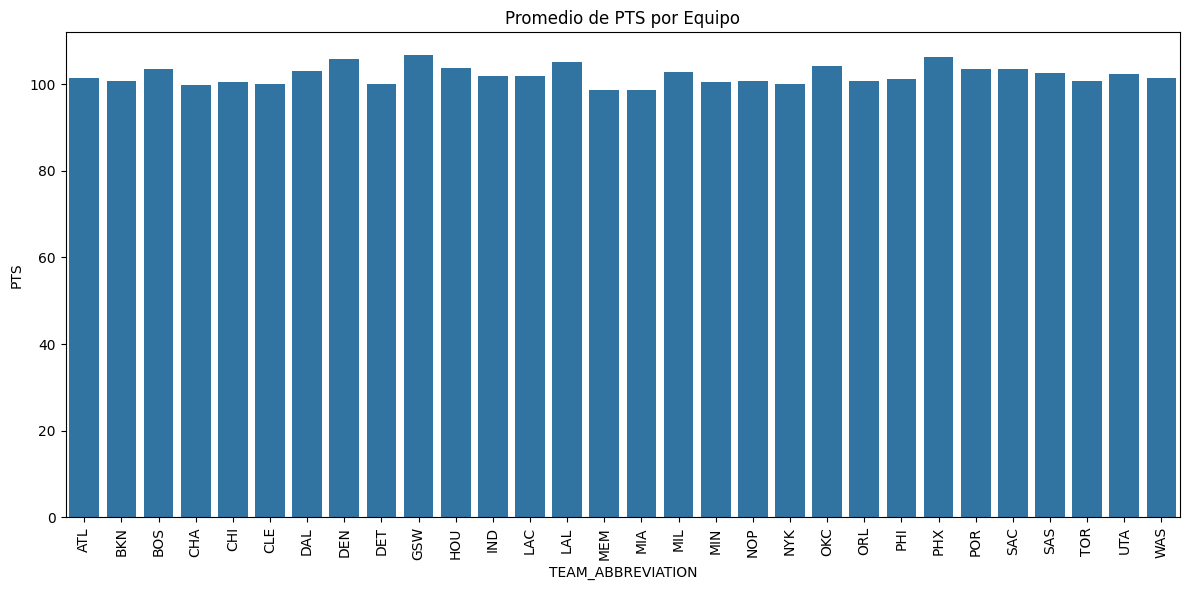

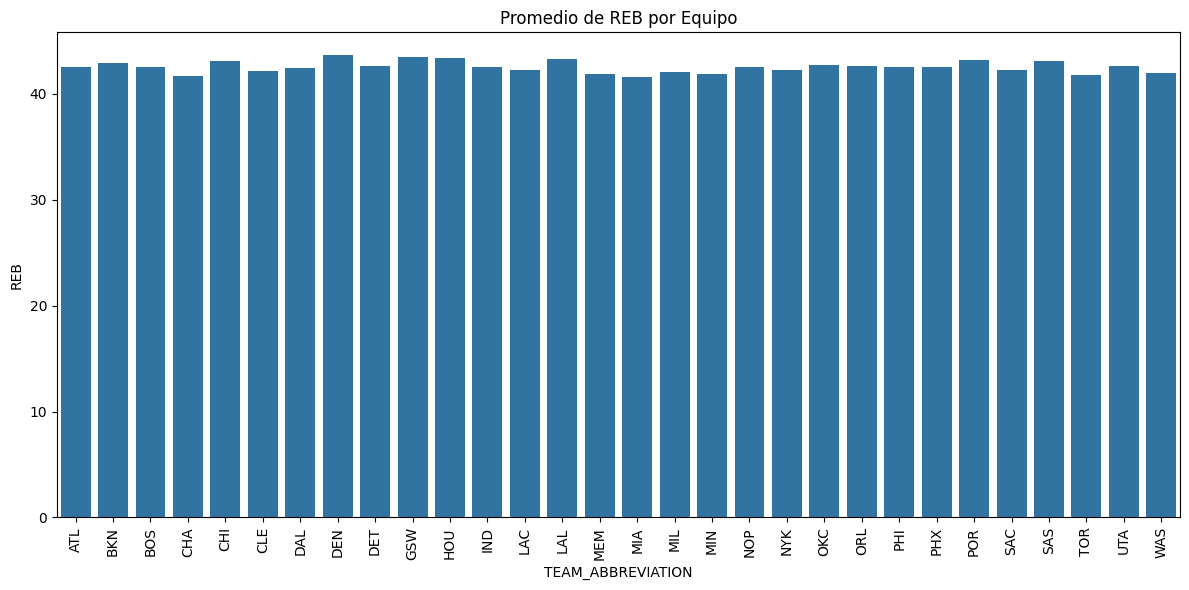

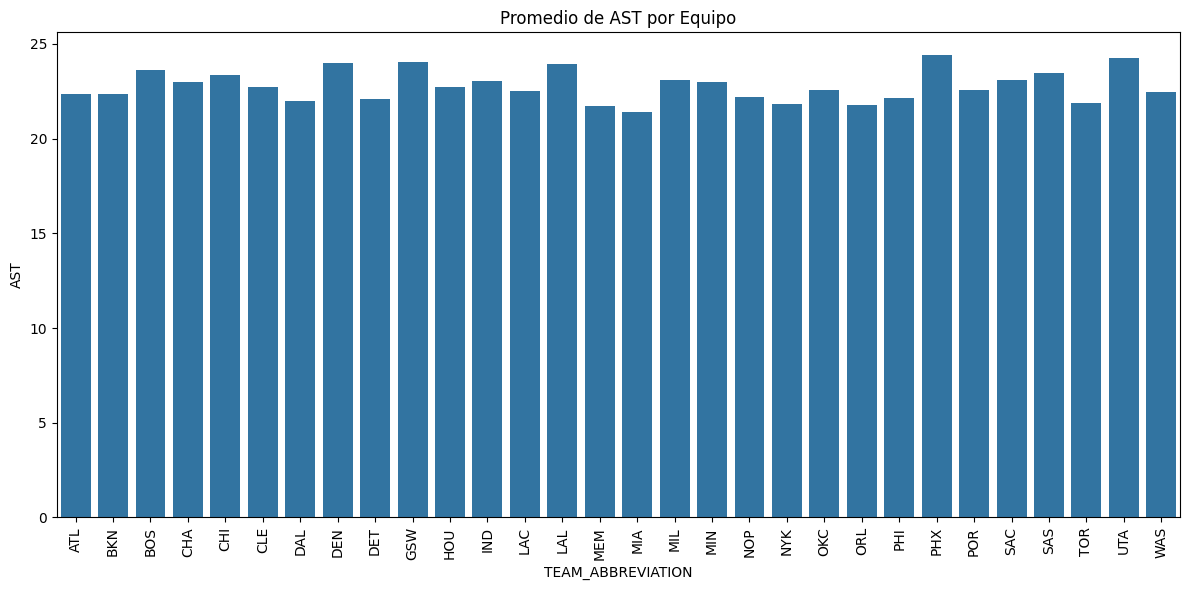

In [ ]:
# Agrupamos por el equipo y calculamos las métricas clave de interés (PTS, REB, AST)
team_performance = df_limpio.groupby('TEAM_ABBREVIATION')[['PTS', 'REB', 'AST']].mean()

# Visualizamos las métricas clave por equipo
import seaborn as sns
import matplotlib.pyplot as plt

# PTS por equipo
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=team_performance.index, y=team_performance['PTS'])
plt.title('Promedio de PTS por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotación y tamaño de fuente de las etiquetas
plt.tight_layout()
plt.show()

# REB por equipo
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=team_performance.index, y=team_performance['REB'])
plt.title('Promedio de REB por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotación y tamaño de fuente de las etiquetas
plt.tight_layout()
plt.show()

# AST por equipo
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=team_performance.index, y=team_performance['AST'])
plt.title('Promedio de AST por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotación y tamaño de fuente de las etiquetas
plt.tight_layout()
plt.show()


nterpretación: Este análisis nos permite observar qué equipos tienen mejores o peores promedios en puntos, rebotes y asistencias. Un rendimiento consistente en estas métricas clave podría indicar un equipo más fuerte. También podemos notar si los equipos con mejores estadísticas en ciertas áreas tienden a ganar más partidos.

## <b>Análisis por localía/visitante (MATCHUP) </b>
Objetivo: Verificar si la localía afecta variables como PLUS_MINUS o WL (win/lose)

In [ ]:
# Creamos una columna para determinar si es partido de local o visitante
df_limpio['is_home_game'] = df_limpio['MATCHUP'].apply(lambda x: x.split('-')[0] == df_limpio['TEAM_ABBREVIATION'])

# Calculamos el promedio de PLUS_MINUS y WL para partidos locales y visitantes
home_away_performance = df_limpio.groupby('is_home_game')[['PLUS_MINUS', 'WL']].mean()

# Visualizamos los resultados

# PLUS_MINUS por local/visitante
plt.figure(figsize=(8, 5))  # Crear una nueva figura para el primer gráfico
sns.barplot(x=home_away_performance.index, y=home_away_performance['PLUS_MINUS'])
plt.title('Promedio de PLUS_MINUS por Localía/Visitante')
plt.xlabel('Localía (True: Local, False: Visitante)')
plt.ylabel('Promedio de PLUS_MINUS')
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gráfico

# WL por local/visitante
plt.figure(figsize=(8, 5))  # Crear una nueva figura para el segundo gráfico
sns.barplot(x=home_away_performance.index, y=home_away_performance['WL'])
plt.title('Promedio de WL por Localía/Visitante')
plt.xlabel('Localía (True: Local, False: Visitante)')
plt.ylabel('Promedio de WL')
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gráfico


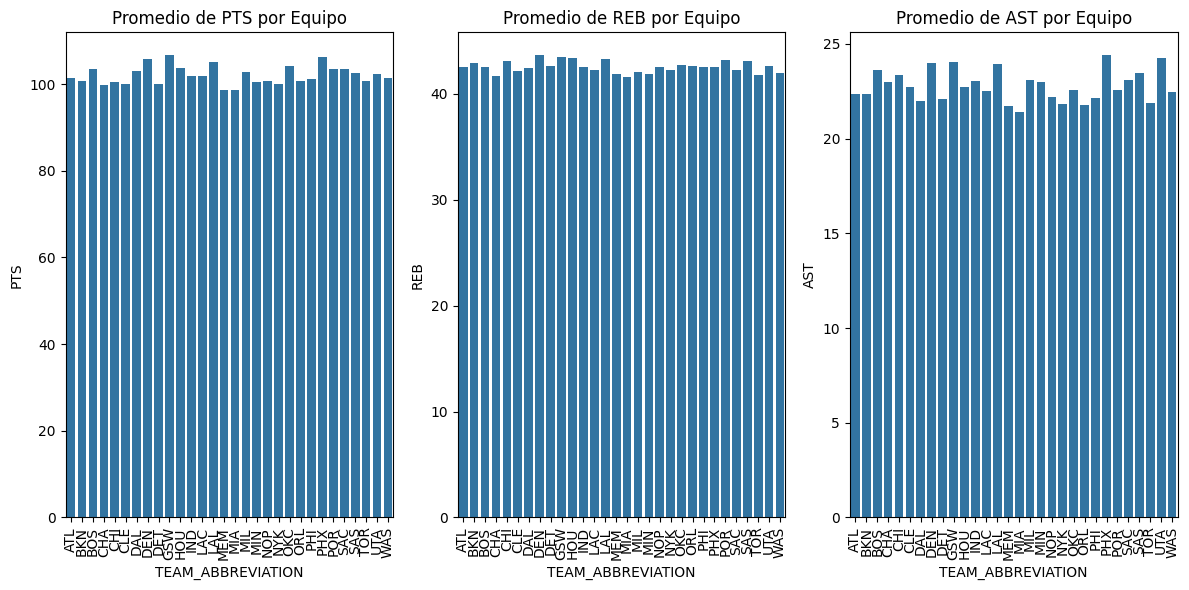

In [ ]:
# Agrupamos por el equipo y calculamos las métricas clave de interés (PTS, REB, AST)
team_performance = df_limpio.groupby('TEAM_ABBREVIATION')[['PTS', 'REB', 'AST']].mean()

# Visualizamos las métricas clave por equipo
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos gráficos de barras para comparar los equipos
plt.figure(figsize=(12, 6))

# PTS por equipo
plt.subplot(1, 3, 1)
sns.barplot(x=team_performance.index, y=team_performance['PTS'])
plt.title('Promedio de PTS por Equipo')
plt.xticks(rotation=90)

# REB por equipo
plt.subplot(1, 3, 2)
sns.barplot(x=team_performance.index, y=team_performance['REB'])
plt.title('Promedio de REB por Equipo')
plt.xticks(rotation=90)

# AST por equipo
plt.subplot(1, 3, 3)
sns.barplot(x=team_performance.index, y=team_performance['AST'])
plt.title('Promedio de AST por Equipo')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Análisis temporal (GAME_DATE)
Objetivo: Evaluar si hay patrones temporales en el rendimiento de los equipos a lo largo de la temporada. Por ejemplo, ¿hay rachas ganadoras o decrecimiento a medida que avanza la temporada?

In [ ]:
# Convertimos la columna GAME_DATE a tipo datetime si aún no lo es
df_limpio['GAME_DATE'] = pd.to_datetime(df_limpio['GAME_DATE'], errors='coerce')

# Agrupamos por mes/año y calculamos el promedio de WL para ver el rendimiento del equipo a lo largo del tiempo
df_limpio['month_year'] = df_limpio['GAME_DATE'].dt.to_period('M')
temporal_performance = df_limpio.groupby('month_year')[['WL']].mean()

# Graficamos la evolución temporal

# Crear una nueva figura para el gráfico
plt.figure(figsize=(10, 6))

# Graficamos el promedio de WL a lo largo del tiempo
temporal_performance.plot(kind='line')

# Añadimos títulos y etiquetas
plt.title('Promedio de WL a lo largo de la temporada')
plt.xlabel('Fecha')
plt.ylabel('Promedio de WL')
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización

# Mostrar el gráfico
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gráfico


TypeError: agg function failed [how->mean,dtype->object]

6. Análisis Avanzado
Interacciones entre variables:
¿Cómo cambia la relación entre PTS y WL en partidos de local y visitante?
¿Hay sinergias entre rebotes (REB) y asistencias (AST) para predecir el resultado?
Clusterización previa: Usar técnicas como k-means para agrupar partidos con características similares y ver si estos grupos están relacionados con WL.
Análisis de importancia: Técnicas como Mutual Information para medir qué tan informativa es cada variable con respecto a WL.
¿Por qué? Esto permite detectar patrones no evidentes y evaluar si ciertas combinaciones de variables tienen un peso importante.



7. Documentación del EDA
Registrar los hallazgos:

Variables significativas: ¿Cuáles parecen más útiles para predecir el resultado?
Problemas encontrados: Desequilibrio de clases, outliers, correlaciones altas, etc.
Próximos pasos: Decisiones sobre ingeniería de características y selección de modelo.
¿Por qué? Mantener un registro asegura claridad y reproducibilidad, además de guiar decisiones futuras.

